In [ ]:

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #-----------Building decision tree model
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
      roc_curve,
)

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split #--------------splitting data into test and train
# from sklearn.tree import DecisionTreeClassifier #-----------Building decision tree model

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix #-----model validation scores
%matplotlib inline

from IPython.display import display #---------------------for displaying multiple data frames in one output

# from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step

import missingno as msno_plot #--------------plotting missing values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ldata= pd.read_csv('/content/drive/MyDrive/Log_regression/Loan_Modelling.csv')

In [ ]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Data Dictionary
ID: Customer ID
Age: Customer’s age in completed years
Experience: #years of professional experience
Income: Annual income of the customer (in thousand dollars)
ZIP Code: Home Address ZIP code.
Family: the Family size of the customer
CCAvg: Average spending on credit cards per month (in thousand dollars)
Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
Mortgage: Value of house mortgage if any. (in thousand dollars)
Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
Securities_Account: Does the customer have securities account with the bank?
CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online: Do customers use internet banking facilities?
CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?
[5]
0s


In [ ]:
ldata.shape

(5000, 15)

In [ ]:
# checking for unique values in ID column
ldata["ID"].nunique()

5000

There are 5000

In [ ]:
ldata.sample(n=5, random_state=1)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0


A quick looks shows all the columns - CCAVg as a float.
Zip code is also an integer. We need to convert it into a zipcode so that the dataframe do not treat it as an integer to go meaningful explanation after
modeling.

In [ ]:
ldata.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.50,1443.52,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.34,11.46,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.10,11.47,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.77,46.03,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.26,1759.46,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.40,1.15,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.88,0.84,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.10,0.29,0.0,0.00,0.0,0.00,1.0


Observations Mean and Median value for the age column is 45. This shows that majority of the customers are under 45 years of age. Mean Income is approx 73K but it has a wide range with values from a min of 8 (?) to 224.  Experience: #years of professional experience, is 20 years, min is -3 (?) and Max being 43 years. Income: Annual income of the customer (in thousand dollars): 73000. Min income is 8000 USD and Max is 224,000. Family: the Family size of the customer, Max is 4 , Mean family size is 2. Mortgage: Value of house mortgage if any. (in thousand dollars): Average Mortage is 56000, Max is about 635,000.We will explore this further in univariate analysis.

In [ ]:
# checking for duplicate values
ldata.duplicated().sum()

0

There are no duplciate values

Univariate Tabulations

> Indented block



In [ ]:
result=ldata.groupby(['Personal_Loan']).mean().T

result.rename(columns={0:"No", 1:"Yes"}, inplace=True)

result["Delta"]=(result["Yes"]/result["No"]-1)*100

result.round(2)

Personal_Loan,No,Yes,Delta
ID,2512.17,2390.65,-4.84
Age,45.37,45.07,-0.66
Experience,20.13,19.84,-1.43
Income,66.24,144.75,118.53
ZIPCode,93170.96,93153.20,-0.02
Family,2.37,2.61,10.07
CCAvg,1.73,3.91,125.87
Education,1.84,2.23,21.14
Mortgage,51.79,100.85,94.72
Securities_Account,0.10,0.12,22.29


CD_accoount, Income and Mortagage have lot of contributions between the people who accept/respond to Personal_Loan campaign.

Univariate analysis

> Indented block



In [ ]:
# function to create box plot and histogram with Mean
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

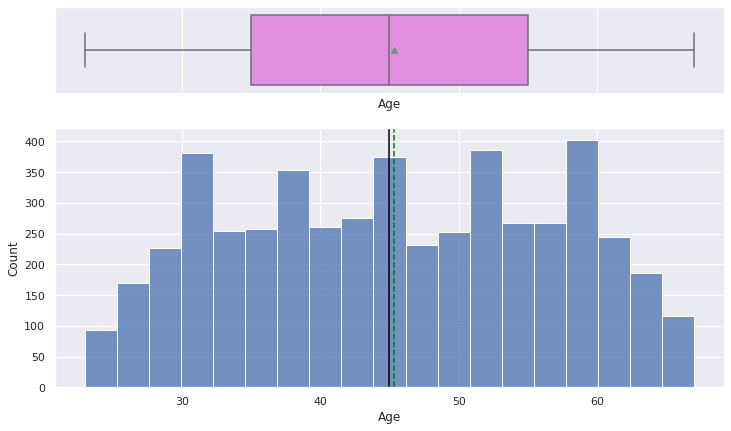

In [ ]:
histogram_boxplot(ldata, "Age")

Age is Normally distributed. Mean age is 45.3, Median is 45.

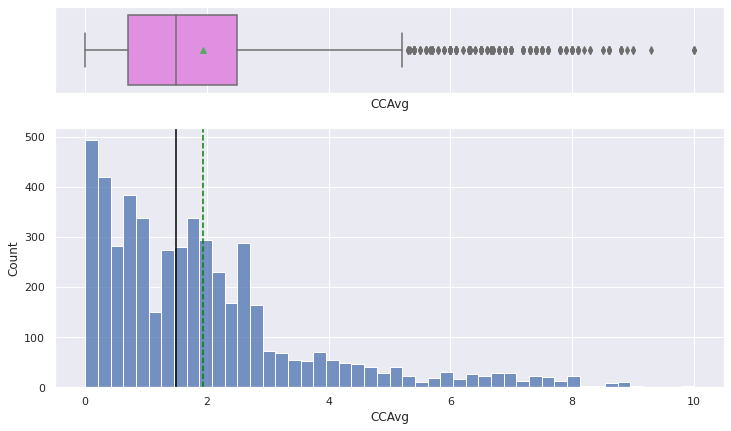

In [ ]:
histogram_boxplot(ldata, "CCAvg")

Average spending on credit cards per month (in thousand dollars) is right skewed. THe mean is 1.93 and Median is 1.5
The boxplot shows that there are outliers at the right end We will not treat these outliers as they represent the real market trend.

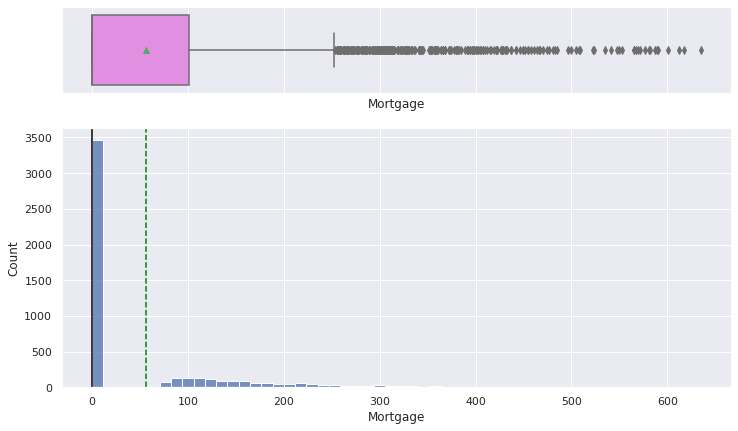

In [ ]:
histogram_boxplot(ldata, "Mortgage")

THere are close to 3400 custoers who have no house mortgage. THese are the customers who can be targeted for loan.

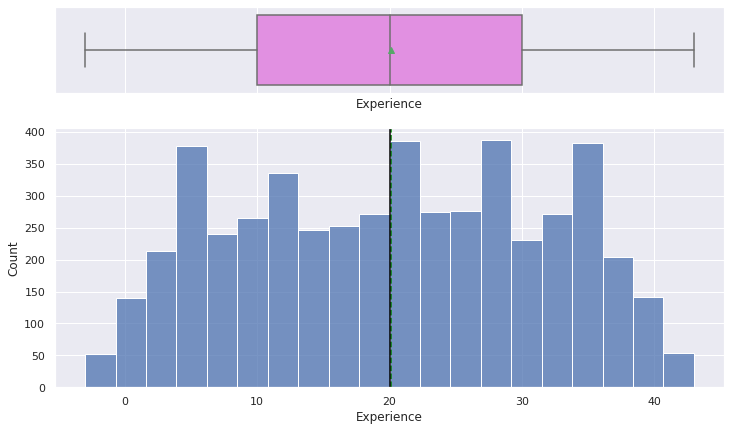

In [ ]:
histogram_boxplot(ldata, "Experience")

Number of years of professional experience seems to be Normally Distributed

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

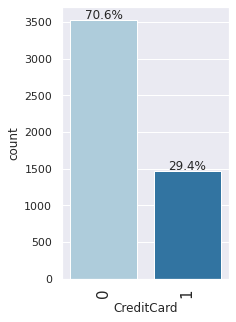

In [ ]:
labeled_barplot(ldata, "CreditCard", perc=True)

only 30% of the memebrs have credit card

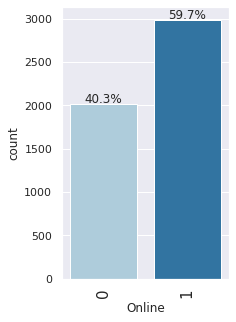

In [ ]:
labeled_barplot(ldata, "Online", perc=True)

About 60% of the memebrs use online banking. So we can target them via online Ads.

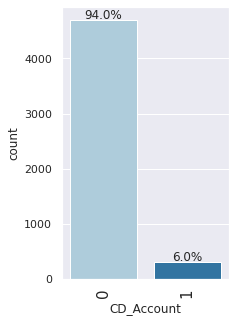

In [ ]:
labeled_barplot(ldata, "CD_Account", perc=True)

Only 6% of the Members have CD account.

In [ ]:
ldata['Education'].unique()

array([1, 2, 3])

THere are three categories of Education.As descbired in the data dictionary we have three unique education categories. Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

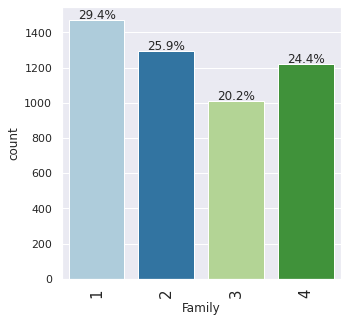

In [ ]:
labeled_barplot(ldata, "Family", perc=True)

About 42 % of the members are Undergrads, while about 30% have Advanced professionals and about 28% have Greaduate degree.

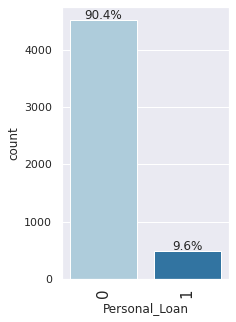

In [ ]:
labeled_barplot(ldata, "Personal_Loan", perc=True)

THere are only 9.6% of members who took personal loan

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


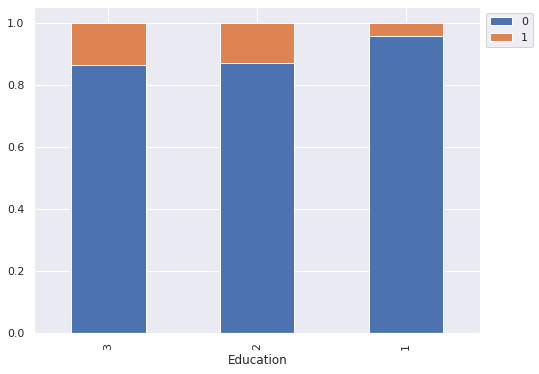

In [ ]:
stacked_barplot(ldata, "Education", "Personal_Loan")

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


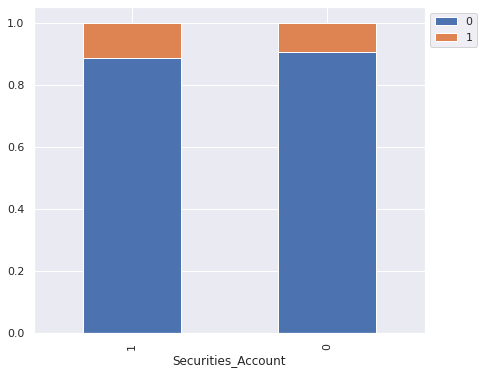

In [ ]:
stacked_barplot(ldata, "Securities_Account", "Personal_Loan")

Few Members (60) with securities account accepted the personal loan offered in the last campaign

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


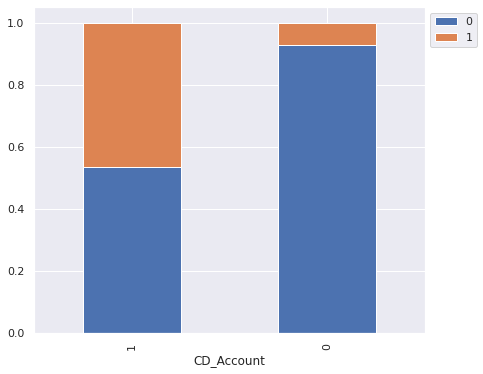

In [ ]:
stacked_barplot(ldata, "CD_Account", "Personal_Loan")

Few Members (140) with securities account accepted the personal loan offered in the last campaign

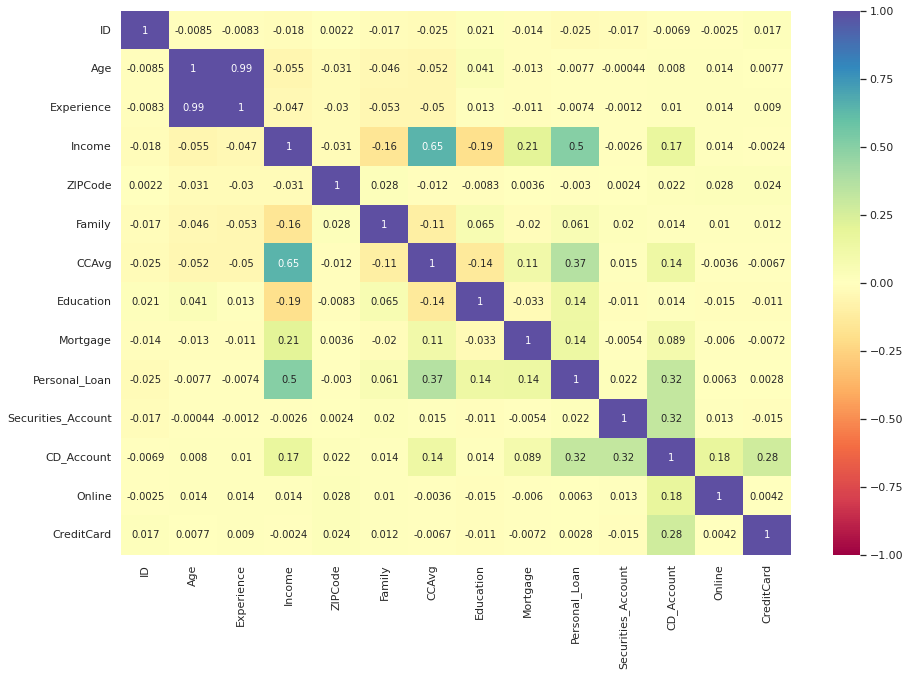

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(ldata.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Income has the 50% corelation with the acceptance of the personal loan , followed with the customer with the average spending on the credit cards and then followed by the people who have certificate of deposit. Education and Mortage each has about 14% correlation.



> Indented block Feature Engineering
: Zip code



In [ ]:
!pip install pgeocode # importing geocoding libraries in Python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



We need to convert our Zipcode variable into a geographic format. The process of converting addresses to geographic information  — to map their locations is called Geocoding.

In [ ]:
import pgeocode # importing libraries

In [ ]:
nomi = pgeocode.Nominatim('us') # we use Nominatim Geocoding service,

In [ ]:
ldata['county']=nomi.query_postal_code(ldata['ZIPCode'].astype('string').to_list()).county_name # we assign zipcodes to the county

In [ ]:
#dropping zipcode as we now have the county
ndata = ldata.drop('ZIPCode', axis=1)

In [ ]:
ndata['county'].unique() # Lists all the unique counties

array(['Los Angeles', 'Alameda', 'City and County of San Francisco',
       'San Diego', 'Monterey', 'Ventura', 'Santa Barbara', 'Marin',
       'Santa Clara', 'Santa Cruz', 'San Mateo', 'Humboldt',
       'Contra Costa', 'Orange', 'Sacramento', 'Yolo', 'Placer',
       'San Bernardino', 'San Luis Obispo', 'Riverside', 'Kern', nan,
       'Fresno', 'Sonoma', 'El Dorado', 'San Benito', 'Butte', 'Solano',
       'Mendocino', 'San Joaquin', 'Imperial', 'Siskiyou', 'Merced',
       'Trinity', 'Stanislaus', 'Shasta', 'Tuolumne', 'Napa', 'Lake'],
      dtype=object)

In [ ]:
#Hot encoding of county for Modeling purpose
ndata = pd.get_dummies(ndata, columns=['county'])
ndata.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,county_Alameda,county_Butte,county_City and County of San Francisco,county_Contra Costa,county_El Dorado,county_Fresno,county_Humboldt,county_Imperial,county_Kern,county_Lake,county_Los Angeles,county_Marin,county_Mendocino,county_Merced,county_Monterey,county_Napa,county_Orange,county_Placer,county_Riverside,county_Sacramento,county_San Benito,county_San Bernardino,county_San Diego,county_San Joaquin,county_San Luis Obispo,county_San Mateo,county_Santa Barbara,county_Santa Clara,county_Santa Cruz,county_Shasta,county_Siskiyou,county_Solano,county_Sonoma,county_Stanislaus,county_Trinity,county_Tuolumne,county_Ventura,county_Yolo
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Hot encoding of Education for Modeling purpose
ndata = pd.get_dummies(ndata, columns=['Education'])
ndata.head()

,ID,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,county_Alameda,county_Butte,county_City and County of San Francisco,county_Contra Costa,county_El Dorado,county_Fresno,county_Humboldt,county_Imperial,county_Kern,county_Lake,county_Los Angeles,county_Marin,county_Mendocino,county_Merced,county_Monterey,county_Napa,county_Orange,county_Placer,county_Riverside,county_Sacramento,county_San Benito,county_San Bernardino,county_San Diego,county_San Joaquin,county_San Luis Obispo,county_San Mateo,county_Santa Barbara,county_Santa Clara,county_Santa Cruz,county_Shasta,county_Siskiyou,county_Solano,county_Sonoma,county_Stanislaus,county_Trinity,county_Tuolumne,county_Ventura,county_Yolo,Education_1,Education_2,Education_3
0,1,25,1,49,4,1.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,45,19,34,3,1.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,1,2.7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,35,8,45,4,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       5000 non-null   int64  
 1   Age                                      5000 non-null   int64  
 2   Experience                               5000 non-null   int64  
 3   Income                                   5000 non-null   int64  
 4   Family                                   5000 non-null   int64  
 5   CCAvg                                    5000 non-null   float64
 6   Mortgage                                 5000 non-null   int64  
 7   Personal_Loan                            5000 non-null   int64  
 8   Securities_Account                       5000 non-null   int64  
 9   CD_Account                               5000 non-null   int64  
 10  Online                                   5000 no

In [ ]:
##ndata['CCAvg'] = ndata['CCAvg'].astype(np.int64)
ndata["CCAvg"].value_counts()

0.30     241
1.00     231
0.20     204
2.00     188
0.80     187
0.10     183
0.40     179
1.50     178
0.70     169
0.50     163
1.70     158
1.80     152
1.40     136
2.20     130
1.30     128
0.60     118
2.80     110
2.50     107
0.90     106
0.00     106
1.90     106
1.60     101
2.10     100
2.40      92
2.60      87
1.10      84
1.20      66
2.30      58
2.70      58
2.90      54
3.00      53
3.30      45
3.80      43
3.40      39
2.67      36
4.00      33
4.50      29
3.60      27
3.90      27
4.30      26
6.00      26
3.70      25
4.70      24
4.10      22
4.90      22
3.20      22
3.10      20
2.33      18
1.67      18
5.40      18
0.67      18
5.00      18
6.50      18
4.40      17
5.20      16
3.50      15
4.60      14
6.10      14
6.90      14
7.00      14
7.20      13
7.40      13
5.70      13
6.30      13
8.00      12
7.50      12
4.20      11
8.10      10
6.80      10
7.30      10
6.33      10
8.80       9
1.33       9
7.60       9
6.70       9
6.67       9
7.80       9

In [ ]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       5000 non-null   int64  
 1   Age                                      5000 non-null   int64  
 2   Experience                               5000 non-null   int64  
 3   Income                                   5000 non-null   int64  
 4   Family                                   5000 non-null   int64  
 5   CCAvg                                    5000 non-null   float64
 6   Mortgage                                 5000 non-null   int64  
 7   Personal_Loan                            5000 non-null   int64  
 8   Securities_Account                       5000 non-null   int64  
 9   CD_Account                               5000 non-null   int64  
 10  Online                                   5000 no

We want to convert ccavg and Mortagae into logscale.

> Indented block



Logtransformations

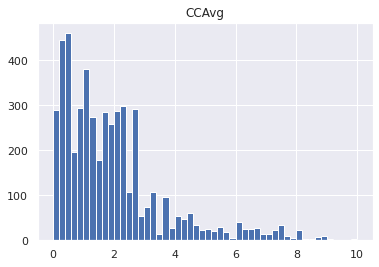

106


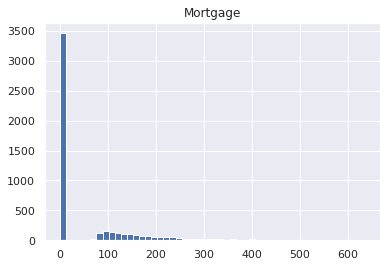

3462


In [ ]:
cols_to_log = ['CCAvg', 'Mortgage']
for colname in cols_to_log:
    plt.hist(ldata[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(ldata[colname] <= 0))

In [ ]:
X= ndata.drop(['Personal_Loan'], axis=1) # removing the dependent variable

In [ ]:
Y= ndata['Personal_Loan'] # defining dependenet variable

In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
Y.value_counts(normalize=True) # original data

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [ ]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, stratify=Y, random_state = 1)

In [ ]:
y_train.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, log_loss

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1);

logreg.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(random_state=1)

In [ ]:
logreg.coef_ #weights associated with the independent variables

array([[-6.13026209e-05, -4.08103609e-01,  4.10013657e-01,
         4.74453242e-02,  1.06964194e+00,  1.67905716e-01,
         7.62210140e-04,  2.51786426e-02,  3.33423829e-01,
        -4.52426348e-02, -1.49810786e-02, -3.22979392e-02,
         2.24836341e-03, -3.00043982e-03,  3.29629603e-02,
        -7.42146468e-03,  2.30820227e-03, -1.26294585e-02,
        -4.27847902e-04,  1.45760611e-02, -3.36861229e-04,
        -3.77456115e-02,  1.31471138e-02, -3.98709200e-03,
        -4.99800845e-04,  2.46041982e-03, -3.67490188e-04,
        -3.14900673e-03,  9.07182714e-03,  2.61787383e-03,
        -2.02006834e-02, -4.15239308e-03, -3.11316936e-02,
         8.26260794e-03,  1.78485535e-03,  4.60100957e-03,
        -3.59226562e-02, -3.74408562e-03,  3.24451181e-02,
         1.80427238e-03,  1.77970228e-03, -6.39734071e-04,
         4.28364017e-03,  1.38788346e-02, -2.44059199e-04,
        -1.84795042e-03, -5.25089384e-04,  1.70034909e-03,
        -1.22590082e-02, -9.91734815e-01,  4.34770018e-0

In [ ]:
logreg.intercept_

array([-0.06019021])

In [ ]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_predict = logreg.predict(X_train) #-----------------Prediction here are 0s and 1s; probability threshold of 0.5

#--------------to get probability values use this snippet

y_predict_prob = logreg.predict_proba(X_train)

In [ ]:
y_predict #0.5 to convert your probability scores to 1 or 0

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predict_prob[:,1]

array([0.00205594, 0.01848404, 0.00095347, ..., 0.00516574, 0.01510288,
       0.00848349])

In [ ]:
## function to get confusion matrix in a proper format

def draw_cm(actual, predicted):

    cm = confusion_matrix(actual, predicted)

    print(cm)

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )

    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()


Trainig accuracy 0.944

Confusion Matrix
[[3115   49]
 [ 147  189]]


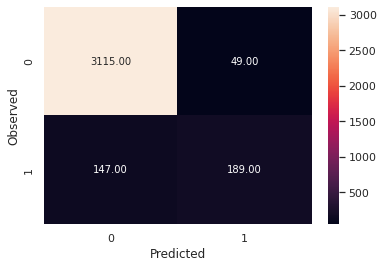

None

Recall: 0.5625

Precision: 0.7941176470588235

F1 Score: 0.6585365853658537

Log Loss: 1.9341826724790216



In [ ]:
#-----------------------------------Regression Score--------------------------------------
print("Trainig accuracy",logreg.score(X_train,y_train))
print()

print('Confusion Matrix')
print(draw_cm(y_train,y_predict))
print()

print("Recall:",recall_score(y_train,y_predict))
print()

print("Precision:",precision_score(y_train,y_predict))
print()

print("F1 Score:",f1_score(y_train,y_predict))
print()

print("Log Loss:",log_loss(y_train,y_predict))
print()

Accuracy is 94%, Recall is 56%, F1 score is 65% , logloss = 1.93 at Threshold of 0.5

Testing accuracy 0.9326666666666666

Confusion Matrix
[[1327   29]
 [  72   72]]


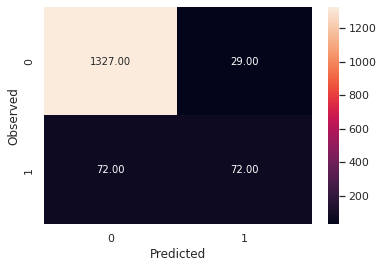

None

Recall: 0.5

Precision: 0.7128712871287128

F1 Score: 0.5877551020408163

Log Loss: 2.3256264028076368



In [ ]:
print("Testing accuracy",logreg.score(X_test, y_test))
print()


y_predict = logreg.predict(X_test)

print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()

print("Recall:",recall_score(y_test,y_predict))
print()

print("Precision:",precision_score(y_test,y_predict))
print()

print("F1 Score:",f1_score(y_test,y_predict))
print()

print("Log Loss:",log_loss(y_test,y_predict))
print()

In [ ]:
print("Roc Auc Score:",roc_auc_score(y_train,logreg.predict(X_train)))

Roc Auc Score: 0.7735066371681416


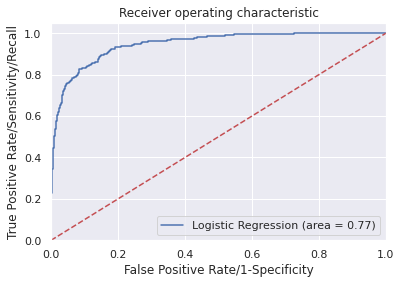

In [ ]:
#AUC ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))

fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate/1-Specificity')
plt.ylabel('True Positive Rate/Sensitivity/Recall')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Steeper the curve better the curve.


,False Positive Rate,True Positive Rate,True Negative Rate (1-False Positive Rate),Difference,Probability Thresholds
0,0.000000,0.000000,1.000000,-1.000000,1.996205
1,0.000000,0.002976,1.000000,-0.997024,0.996205
2,0.000000,0.077381,1.000000,-0.922619,0.960420
3,0.000316,0.077381,0.999684,-0.922303,0.957838
4,0.000316,0.157738,0.999684,-0.841946,0.919432
5,0.000632,0.157738,0.999368,-0.841630,0.917349
6,0.000632,0.199405,0.999368,-0.799963,0.887493
7,0.000948,0.199405,0.999052,-0.799647,0.886551
9,0.001264,0.223214,0.998736,-0.775521,0.868600
8,0.000948,0.223214,0.999052,-0.775838,0.869548


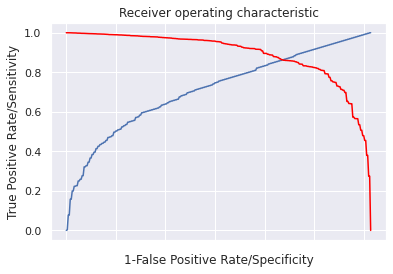

In [ ]:
import pylab as pl

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'False Positive Rate' : pd.Series(fpr, index=i),'True Positive Rate' : \
                    pd.Series(tpr, index = i), 'True Negative Rate (1-False Positive Rate)' : pd.Series(1-fpr, index = i), 'Difference' : pd.Series(tpr - (1-fpr), index = i), 'Probability Thresholds' : pd.Series(thresholds, index = i)})

# roc.iloc[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['True Positive Rate'])
pl.plot(roc['True Negative Rate (1-False Positive Rate)'], color = 'red')
pl.xlabel('1-False Positive Rate/Specificity')
pl.ylabel('True Positive Rate/Sensitivity')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

display(roc.sort_values("True Positive Rate", ascending=True).head(15))

In [ ]:
def play_with_threshold(thresh):

    clf = LogisticRegression(random_state=1)

    clf.fit(X_train, y_train)

    THRESHOLD = thresh

    preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

    print('Confusion Matrix')
    print(draw_cm(y_test,preds))

    print(recall_score(y_test, preds))
    print()

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Confusion Matrix
[[1327   29]
 [  72   72]]


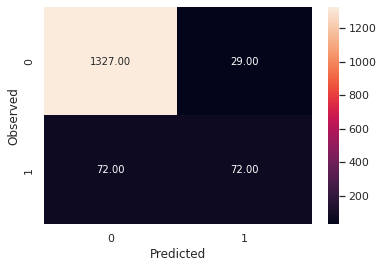

None

Recall 0.5
Precision 0.7128712871287128


In [ ]:
play_with_threshold(0.5)

with 50% Threshold the recall is 0.5 % , that means we are able to identify 50% of  potential customers who have a higher probability of purchasing the loan. And 71% of the customes  predicted by the model as positive is correct

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Confusion Matrix
[[1295   61]
 [  46   98]]


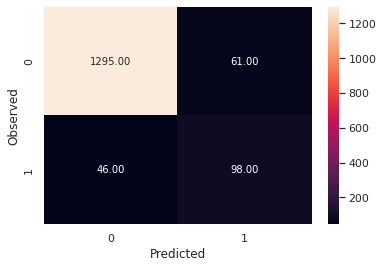

None

Recall 0.6805555555555556
Precision 0.6163522012578616


In [ ]:
play_with_threshold(0.3)

with 30% Threshold the recall is 68 % , that means we are able to identify 68% of potential customers who have a higher probability of purchasing the loan. And 61% of the customes predicted by the model as positive is correct

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Confusion Matrix
[[1346   10]
 [  90   54]]


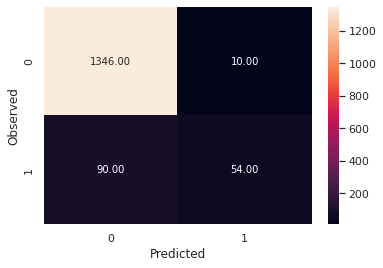

None

Recall 0.375
Precision 0.84375


In [ ]:
play_with_threshold(0.7)

When we incrae the threshold to 70% we decreased the recall. This is expected as we True Negative + False Negative increases (True Negatives increaaed from 1295 to 1346; false Negatives from 46 to 90),  as the number of 0s predicted by the model will be higher.  This also induces a possibility that the number of False Negatives will increase thus lowering Sensitivity

In [ ]:
def cost_optimization_similuator(start_thresh, stop_thresh, invest, returns_TP):


    """
    1. start_thresh: Starting Threshold of Probablity
    2. stop_thresh: stop_thresh
    3. invest: Cost of reaching out to Positives (Could be Campaign, effor ivestment)
    4. returns_TP: Expected returns if Positives are identified correctly

    """

    #-----We define and train a logistic regression model

    clf = LogisticRegression(random_state=1)

    clf.fit(X_train, y_train)

    #----We create empty list to store profit, loss, and investment

    #---Profit: True Positives - They will come back, buy stuff, which will result in revenue

    #----Loss: FN - Lost customers - We are lossing out on revenue

    #----Investment - Target customers at risk of chruring out.

    roi_val=[]
    thresh_val=[]

    range_thresh=np.arange(start_thresh,stop_thresh,0.01) #Simulations by 0.01 increment

    print("Total Simulations: ", len(range_thresh))

    for i in range_thresh:

        preds = np.where(clf.predict_proba(X_test)[:,1] > i, 1, 0)

        cm=confusion_matrix(y_test,preds)

        TP=cm[1][1]

        FP=cm[0][1]

        FN=cm[1][0]

        """
        ROI = True Positives x Expected Returns - Investment (TP + FP * Investment Amount) - Loss from FN(FN*Expected Returns)

        """

        roi = returns_TP*TP - ((FP + TP) *invest + FN*returns_TP)

        roi_val.append(roi)

        thresh_val.append(i)


    return roi_val, thresh_val




In [ ]:
roi_val, thresh_val=cost_optimization_similuator(0.2, 0.7, 7, 10)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Total Simulations:  50


In [ ]:
print(roi_val)

[-697, -696, -673, -638, -642, -640, -625, -650, -629, -608, -593, -598, -611, -636, -634, -646, -646, -659, -665, -644, -644, -675, -681, -693, -686, -665, -658, -670, -656, -662, -707, -693, -686, -686, -686, -679, -665, -664, -696, -682, -675, -687, -693, -706, -705, -731, -724, -756, -782, -795]


In [ ]:
def play_with_threshold(thresh):

    clf = LogisticRegression(random_state=1)

    clf.fit(X_train, y_train)

    THRESHOLD = thresh

    preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

    print('Confusion Matrix')
    print(draw_cm(y_test,preds))
    print()
    print("Recall", recall_score(y_test,preds))
    print("Precision", precision_score(y_test,preds))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Confusion Matrix
[[1327   29]
 [  72   72]]


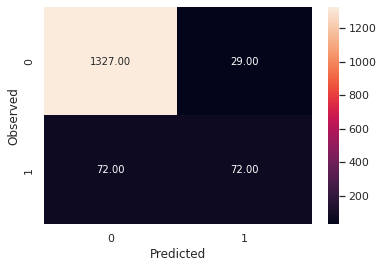

None

Recall 0.5
Precision 0.7128712871287128


In [ ]:
play_with_threshold(0.5)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Confusion Matrix
[[1346   10]
 [  90   54]]


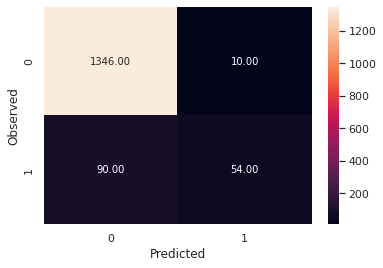

None

Recall 0.375
Precision 0.84375


In [ ]:
play_with_threshold(0.7)

In [ ]:
clf = LogisticRegression(random_state=1)

clf.fit(X_train, y_train)

THRESHOLD = 0.5

preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)],
             index=["accuracy", "recall", "precision", "roc_auc_score"])

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,0
accuracy,0.932667
recall,0.500000
precision,0.712871
roc_auc_score,0.739307


so, with the Threshold of 50% , 50%% of the time we can predict the ability customer will buy a personal loan or not. It tells me that  71%% of the values which are predicted by the model as 1s is correct.
F1 Score: It is the harmonic mean of Precision and Recall.
F1 Score: It is the harmonic mean of Precision and Recall. It is calculated as 2 x (Precision * Recall) / (Precision + Recall). In our case it is 2 * (0.71*0.50) / (0.50+0.71) = 0.28. We have been able to build a predictive model that can be used by the bank to find the customers who will buy personal loan  with an f1_score of 0.28 .

Becasue the cost of defaluting on the loan is much more expensive than the interest the bank may gain ,lower recall is not a bad idea. But want to check other thresholds.

In [ ]:
clf = LogisticRegression(random_state=1)

clf.fit(X_train, y_train)

THRESHOLD = 0.25

preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)],
             index=["accuracy", "recall", "precision", "roc_auc_score"])

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,0
accuracy,0.921333
recall,0.715278
precision,0.572222
roc_auc_score,0.829247


so, with the Threshold of 10% , 85.4% of the time we can predict the ability customer will buy a personal loan or not. It tells me that only 41.2% of the values which are predicted by the model as 1s is correct.
F1 Score: It is the harmonic mean of Precision and Recall. It is calculated as 2 x (Precision * Recall) / (Precision + Recall). In our case it is 2 * (0.57*0.71) / (0.57+0.71) = 0.31%. Though the recall has improved from 50% to 71% I would be apprehensive to use this model to judge/give personal loan. As the cost of defaulting on the loan is much more expensive.

In [ ]:
clf = LogisticRegression(random_state=1)

clf.fit(X_train, y_train)

THRESHOLD = 0.10

preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)],
             index=["accuracy", "recall", "precision", "roc_auc_score"])

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,0
accuracy,0.869333
recall,0.854167
precision,0.412752
roc_auc_score,0.862555


so, with the Threshold of 10% , 85.4% of the time we can predict  the ability customer will buy a personal loan or not.
It tells me that only 41.2% of the values which are predicted by the model as 1s is correct. As discussed above it is not a good idea to use the threshold of 10%.

F1 Score: It is the harmonic mean of Precision and Recall. It is calculated as 2 x (Precision * Recall) / (Precision + Recall). In our case it is 2 * (0.41*0.85) / (0.41+0.85) = 0.55. Thus, We have been able to build a predictive model that can be used by marketing team  with an f1_score of 0.55% on the training set and formulate marketing strategies accordingly.

# DECISION TREE

In [ ]:
model_gini=DecisionTreeClassifier(criterion='gini', random_state=42)
model_entropy=DecisionTreeClassifier(criterion='entropy', random_state=42)


We are trying both cost functions to check which works better.

In [ ]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
print('Training Data Accuarcy Score: Gini Index',model_gini.score(X_train, y_train))  # performance on train data
print('Training Data Accuracy Score: Entropy',model_entropy.score(X_train, y_train))  # performance on train data

Training Data Accuarcy Score: Gini Index 1.0
Training Data Accuracy Score: Entropy 1.0


As expected accuracy on Training is high

TWo cost functions are used. Gini index and Entropy.


In [ ]:
print('Testing Data Accuracy Score:',model_gini.score(X_test, y_test))  # performance on test data
print('Testing Data Accuracy Score:',model_entropy.score(X_test, y_test))  # performance on test data

Testing Data Accuracy Score: 0.9793333333333333
Testing Data Accuracy Score: 0.9793333333333333


Accuracy on Test is a bit lower than Training. Both are same. i.e Gini and Entropy have the same loss function.

As discussed DTs are prone to overfitting. Training accuracy turns out to be 1, i.e. 100% for both criterion whereas Test accuracy is  ≈  98%
The accuarcy score will be different for different Criterion. For Gini Index we use the following formula:



In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)

    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])

    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize = (10,7))

    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

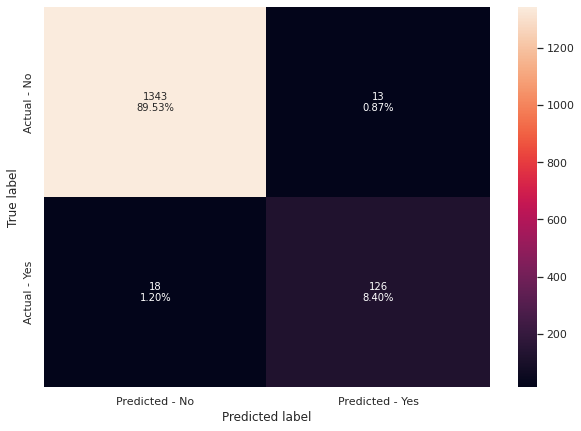

In [ ]:
make_confusion_matrix(model_gini,y_test)

True Positives: 126.
  Reality: The customers took a loan (126) of the customers.
  Model Prodicted:  126 will contribute to the revenue
  Outcome: The model is  good.

  True Negatives:
  Reality: THe customers did not take the loan (1343)
  These customers do not contribute to the revenue and do not contribute to the business.

  False Positives:
  About 13 customers did NOT take the loan.
  Model predicted will contribute to the revenue
  Outcomes: Targeting the potential customers will be wasting their ressources on the customers/people who will NOT be contributing to the revenue.

  False Negatives: 18 of the customers did take the laon.
  Model Predicted: The customer will NOT contribute to revenue.
  Outcome: The potential customer is missed by the sales/marketing team, the team could have offered the potential customer some discount or loyalty card to make the customer come again to purchase. (Customer retention will get affected.)









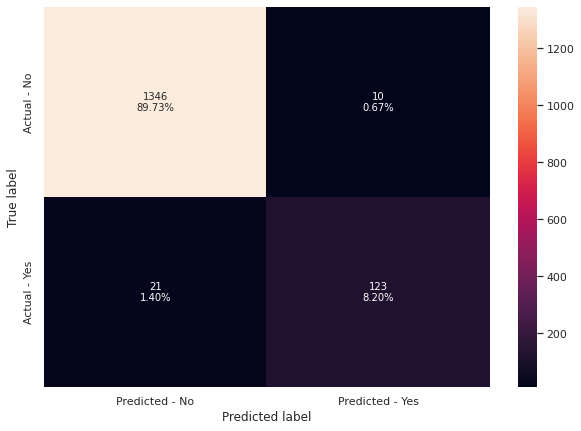

In [ ]:
make_confusion_matrix(model_entropy,y_test)

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
get_recall_score(model_gini)

Recall on training set :  1.0
Recall on test set :  0.875


# Recall on Training set is 100% using the cost functions Gini index.

In [ ]:
get_recall_score(model_entropy)

Recall on training set :  1.0
Recall on test set :  0.8541666666666666


In [ ]:
from sklearn.tree import plot_tree

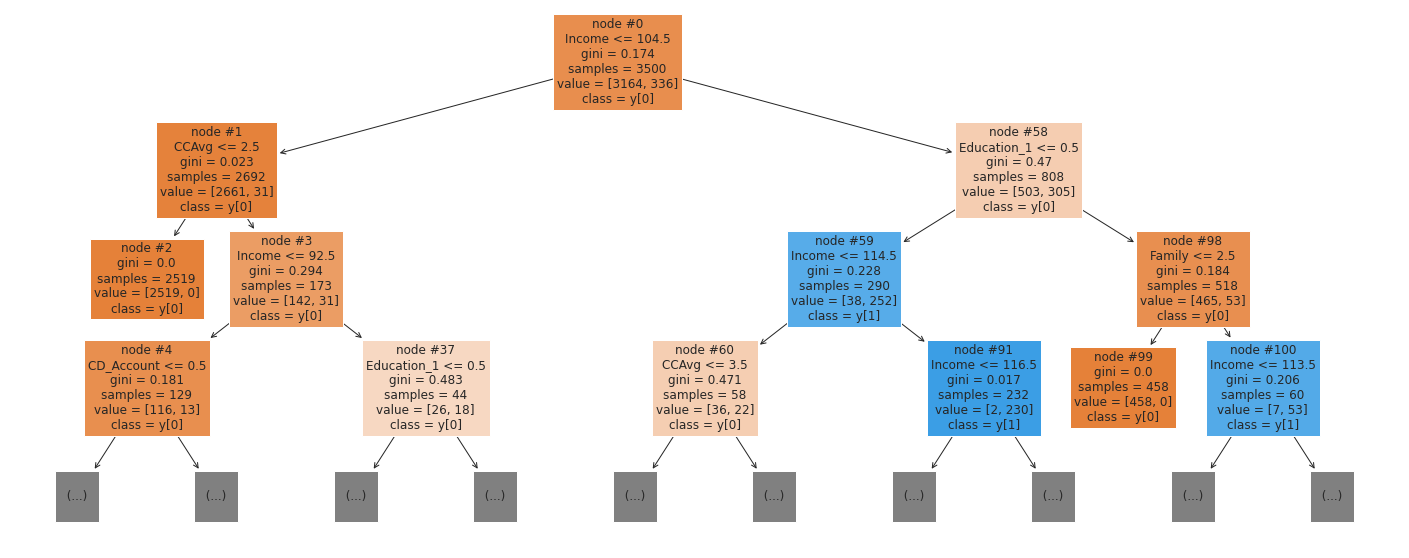

In [ ]:
features = list(X.columns)

plt.figure(figsize=(25,10))
plot_tree(model_gini, max_depth=3, feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

In [ ]:
print("Depth of DT using Gini")
model_gini.get_depth()

Depth of DT using Gini


12

In [ ]:
## Calculating feature importance

feat_importance = model_gini.tree_.compute_feature_importances(normalize=False)

feature_cols=features

feat_imp_dict = dict(zip(feature_cols, model_gini.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)

feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head(20) #Top 10 features

,FeatureImportance
Education_1,0.368526
Income,0.365670
Family,0.147508
CCAvg,0.028883
Age,0.022656
ID,0.017432
Mortgage,0.008109
Online,0.007137
county_Santa Clara,0.006898
Experience,0.006320


:
Feature importance: Variables are ranked in descending order.
Top Three are Education, Income and Family.
Education and Income each has 36% contribution to respond to Personal loan campaign. Family has 14% impact on personal loan campaign.

Correlation: A high level of Education and Income in general has positive impact on revenue.

But we cannot tell the directionality of the effect. Wheather Education , Income , and Family has positve or negative impact on the chances of Personal_loan.

In [ ]:
feat_imp.sum()

FeatureImportance    1.0
dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1) #defeault model

#--------------------96 DT Models---------------

# Grid of parameters to choose from (hyper parameters)
parameters = {
            'max_depth': np.arange(18, 20), #5,6,7,8, 9, 10 - 6 combination
            'class_weight': ['balanced', 'None'],    #- 2 combinations
            'criterion': ['entropy','gini'], # - 2 combinations
                'min_impurity_decrease': [0.000001,0.00001,0.0001, 0.001], #-4 combinations
#             'max_features': ['log2','sqrt'] #default - all independent variables are used
             }

#log2 - maxfeatures = log2(Toal features in the data) E.g. Total feature=8 log2(8) = 3, randomly pick 3 features to build the
#tree. Squre root - sqrt(Total features), e.g. TF-16, 4 randomly selected features to build my tree.

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=3) #---cross validation
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 221, in fit
    self.class_weight, y_original
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/class_weig

DecisionTreeClassifier(class_weight='balanced', max_depth=18,
                       min_impurity_decrease=0.001, random_state=1)

We checked what possible combination of hyperparameters give us high recall values. This is done by
choosing the "Max_depth" we want to try 18, 19, 20
"class_weight": balanced and noe
"Criterion": trying GIni and Entropy
"min_impurity decrease": Trying 4 different values


Chose the combniation that has HIGH RECALL SCORE on the TREE model.

Using the above three fold cross validation, we
Implement on the traning data, we get the HIGHEST RECALL with DecisionTreeClassifier(class_weight='balanced',
 max_depth=20,
                      
   min_impurity_decrease=0.001,
   random_state=1 - we get MAX RECALL SCORE.

   

                     


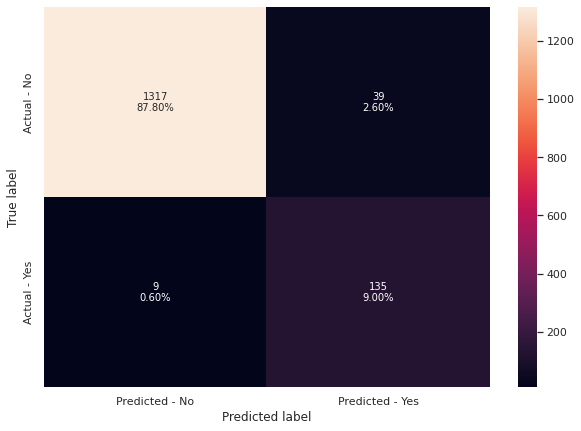

In [ ]:
make_confusion_matrix(estimator,y_test)

In [ ]:
get_recall_score(estimator)

Recall on training set :  1.0
Recall on test set :  0.9375


We have significantly improved the recall on the test data score from 87 % to 93% . Thus I have prevented the model from overfitting.

In [ ]:
## Calculating feature importance

feat_importance = estimator.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, estimator.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)

feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head(15) #Top 10 features

,FeatureImportance
Income,0.664913
Family,0.145391
Education_1,0.099454
CCAvg,0.066665
Age,0.010397
ID,0.009843
Experience,0.003336
county_Santa Cruz,0.000000
county_San Benito,0.000000
county_San Bernardino,0.000000


Now, after grid search cross validation the feature importance has changed to Income, (66%) followed family size (14%).
The cross validation has chnaged from Educ, Income and Family.
So the topmost driver for personal_loan campaign is INCOME.





In [ ]:
feat_imp_req=feat_imp[feat_imp['FeatureImportance']>0]

feat_imp_req.head(20)

,FeatureImportance
ID,0.009843
Age,0.010397
Experience,0.003336
Income,0.664913
Family,0.145391
CCAvg,0.066665
Education_1,0.099454


The top drivers are as listed above. ID, Age, Expereience, Income, Family, CCAve (creditcard average), Education


In [ ]:
feat_imp_req.index

Index(['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education_1'], dtype='object')

Explainable AI with SHAP

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [ ]:
import shap #LIME

In [ ]:
explainer = shap.TreeExplainer(estimator)

In [ ]:
shap_values = explainer.shap_values(X_train)

In [ ]:
shap_values[1] #0, 1 indices are Revuene = 0 / 1

array([[ 1.09258094e-03, -2.04012030e-02,  5.22019680e-04, ...,
         4.79430408e-02,  0.00000000e+00,  0.00000000e+00],
       [-7.44047619e-03,  1.14835275e-02, -1.28405563e-02, ...,
         2.24868874e-02,  0.00000000e+00,  0.00000000e+00],
       [ 1.09258094e-03, -6.76965811e-03,  8.99776210e-04, ...,
         4.97941448e-02,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.34810928e-02, -9.57636529e-03,  2.63580290e-04, ...,
        -1.23446869e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.09258094e-03,  2.66401952e-03, -6.78061603e-03, ...,
        -4.16225349e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.09258094e-03, -6.76965811e-03,  8.99776210e-04, ...,
         2.43493211e-02,  0.00000000e+00,  0.00000000e+00]])

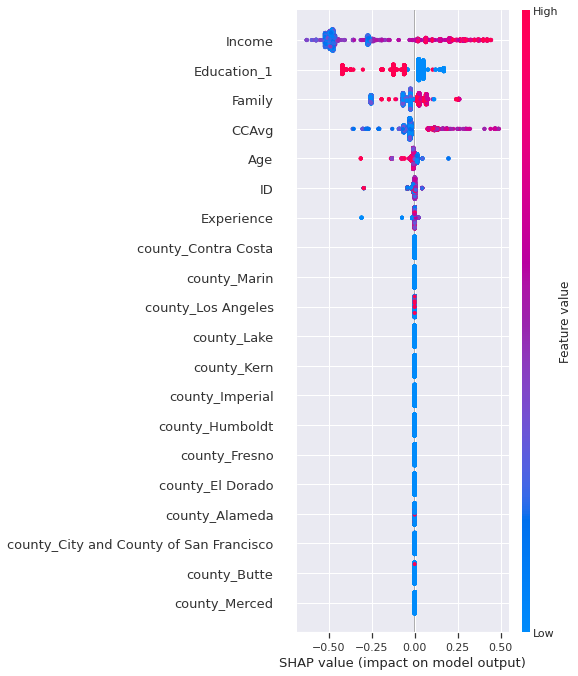

In [ ]:
# shap.summary_plot(shap_values, X_train)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_train)

Features arreanged in terms of importance. Income has the higherst importance.
Bench Mark value of 0.
County have no impact.
Income ,CCAvg (Red color more)   have higher value. Education has low value.
Family also higher vlaue (Red color more)  



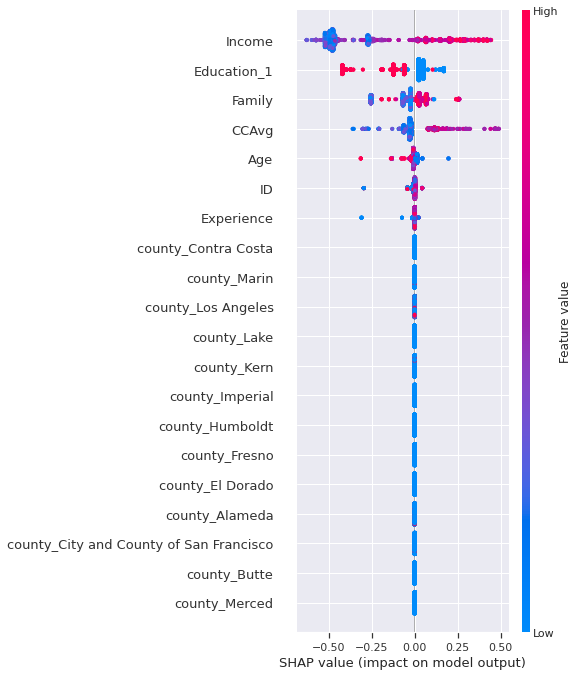

In [ ]:
# shap.summary_plot(shap_values, X_train)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_train)

Income is the higherst driver, followed by Undergrad Education, then the size of the family of the customer, Average spending on credit cards per month (in thousand dollars) ,  Age: Customer’s age in completed years.

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

Optional - CCP using original Gini model and not the Grid Search CV based model

In [ ]:
path = model_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

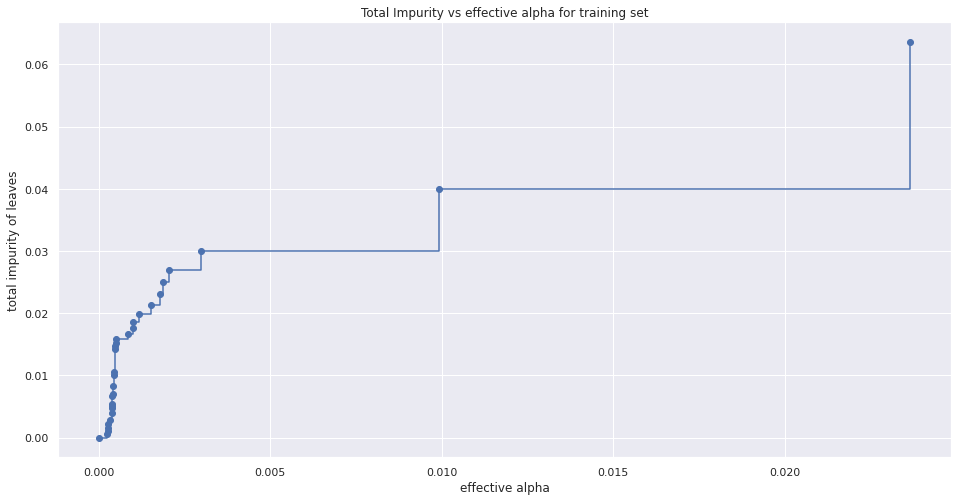

In [ ]:
fig, ax = plt.subplots(figsize=(16,8));
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post");
ax.set_xlabel("effective alpha");
ax.set_ylabel("total impurity of leaves");
ax.set_title("Total Impurity vs effective alpha for training set");

In [ ]:
clfs = [] #empty list

for ccp_alpha in ccp_alphas:

    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha) #Build models with different CCP values
    clf.fit(X_train, y_train)
    clfs.append(clf) #All model objects are stored in the list

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.05500087826368064


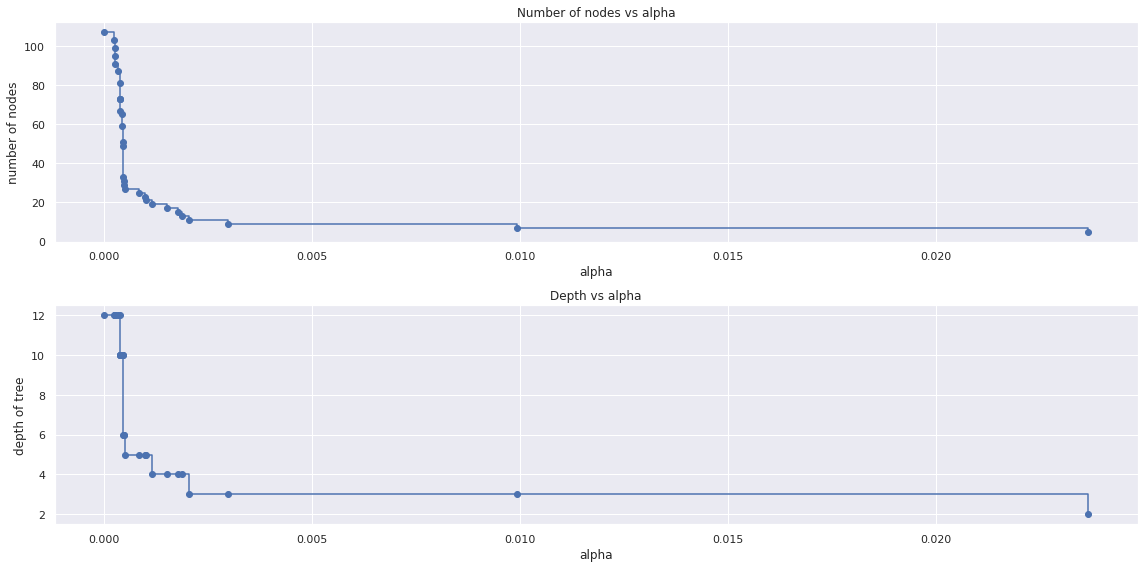

In [ ]:
clfs = clfs[:-1]

ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]

depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1,figsize=(16,8))

ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

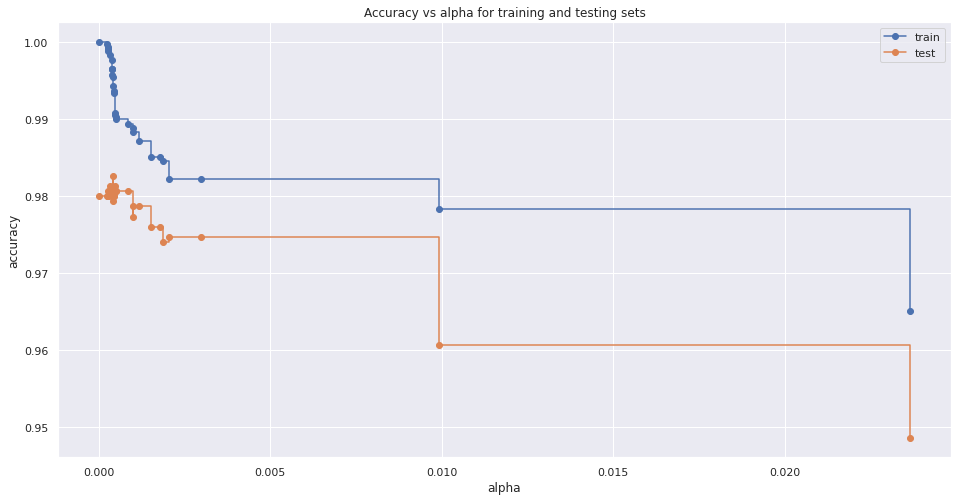

In [ ]:
fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]


ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

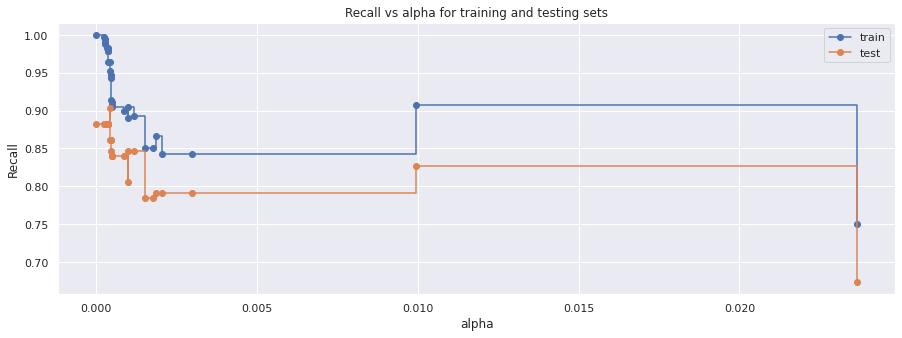

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
model_gini=DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=0.0027)
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0027, random_state=42)

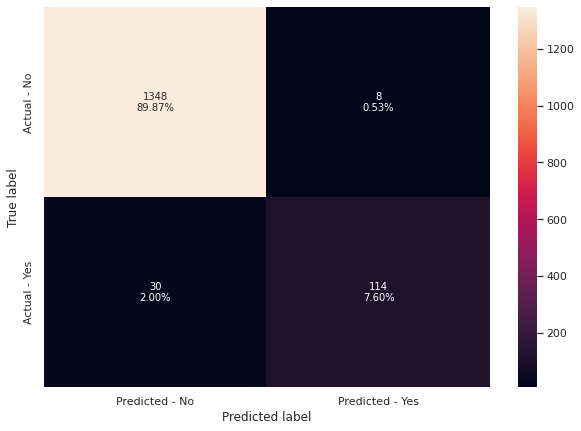

In [ ]:
make_confusion_matrix(model_gini,y_test)

In [ ]:
get_recall_score(model_gini)

Recall on training set :  0.8422619047619048
Recall on test set :  0.7916666666666666





**Comparision of Decision Tree and Logistic regression:**


Decision Trees are known as non-Parametric models because, it doesn't learn any parameters rather uses a if-else logic to create a tree
Most platforms (e.g. Python, R) builds a full grown decision tree when training itself. This means decision trees are prone to overfitting, hence require some form of pruning.


Decision Trees are robust to outliers and multi colinearity, hence we don't perform any treatment usually when building the trees
We create two models: 1. Using criterion as Gini, and the other using Entropy.

hence, we get a better recall on the training set using decsion tress (84%). In terms of the logistc regression we could achieve thei 84% recall with 10% Threshold.

So , in addition, since Decision trees doesn't make any assumption about multicolinearity or data distribution hence often from a data preprocessing stand point, we don't perform variable reduction or outlier treatment as such. Decision Trees make very few assumptions about the training data (as opposed to linear models, which obviously assume that the data is linear, for example). If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely, and most likely overfitting it. Such a model is often called a nonparametric model, not because it does not have any parameters (it often has a lot) but because the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data. In contrast, a parametric model such as a linear model has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).


Using Cart and AI SHap we derived easilyt that :
Income is the higherst driver, followed by Undergrad Education, then the size of the family of the customer, Average spending on credit cards per month (in thousand dollars) ,  Age: Customer’s age in completed years.
Thought the logistic regression also gives co-efficients which can be interpreted for each individual contribution, I feel CART is a better model. CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.


